# <center> What is `K-fold cross validation`?

K-fold cross-validation is a technique used in machine learning to evaluate the performance of a model. Here's a simple way to understand it:
<li><b>Data Splitting</b>: Your dataset is divided into k equal-sized chunks or "folds".
<li> <b>Training and Testing:</b>
<ol> <li> You train the model k times.
    <li> Each time, you use k−1 folds to train the model and the remaining 1 fold to test it.
    <li> For example, if k=5, in the first round, you might use folds 1-4 to train and fold 5 to test. In the second round, use folds 1-3 and 5 to train and fold 4 to test, and so on.
</ol>
<li> <b>Average Performance:</b> After all k rounds, you average the performance metrics (like accuracy, precision, recall) from each test to get a final evaluation.

### Why Use K-fold Cross-Validation?
More Reliable Evaluation: By testing on different subsets of data, you get a more accurate estimate of your model’s performance.
Efficient Use of Data: All data points are used for both training and testing, which is particularly useful if you have a limited dataset.


In [70]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [2]:
digits = load_digits()


In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(digits.data, digits.target, test_size= 0.3)

In [33]:
lr = LogisticRegression(max_iter=1000)
lr.fit(xtrain, ytrain)
lr.score(xtest, ytest)

0.9592592592592593

In [34]:
svm = SVC()
svm.fit(xtrain, ytrain)
svm.score(xtest, ytest)

0.9888888888888889

In [35]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
rf.score(xtest, ytest)

0.9796296296296296

In [54]:
k_fold = KFold(n_splits=3)
k_fold

KFold(n_splits=3, random_state=None, shuffle=False)

### How does it work?

In [55]:
for train_index, test_index in k_fold.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


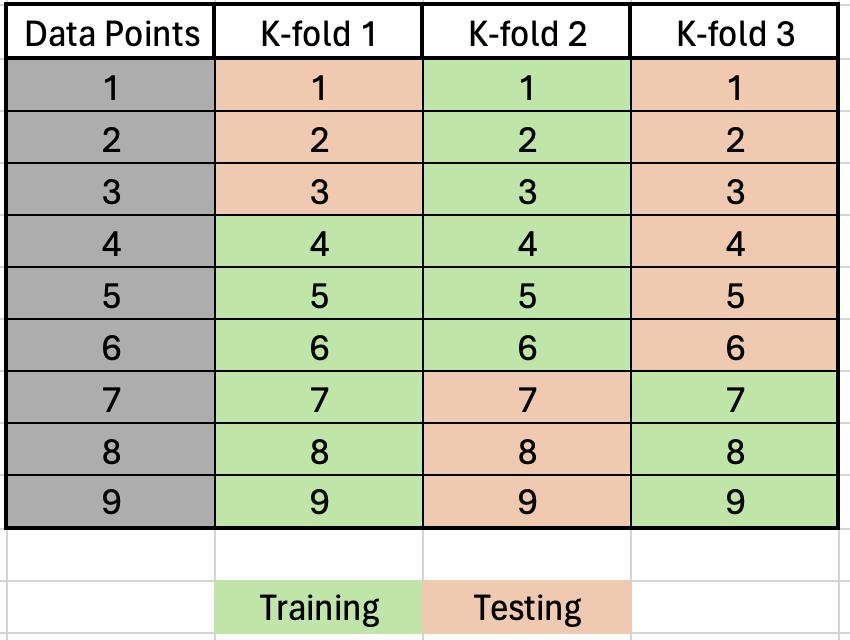

In [61]:
def get_score(model, xtrain, xtest, ytrain, ytest):
    model.fit(xtrain,ytrain)
    return model.score(xtest,ytest)

get_score(LogisticRegression(max_iter=150), xtrain, xtest, ytrain, ytest)
get_score(SVC(),xtrain, xtest, ytrain, ytest)
get_score(RandomForestClassifier(), xtrain, xtest, ytrain, ytest)

0.9685185185185186

In [62]:
folds = StratifiedKFold(n_splits=3)

In [68]:
scores_l = []
scores_svm = []
scores_rf = []

for train_index, test_index in k_fold.split(digits.data):
    xtrain, xtest, ytrain, ytest = digits.data[train_index], digits.data[test_index], digits.target[train_index], digits.target[test_index]
    scores_l.append(get_score(LogisticRegression(max_iter=1000), xtrain, xtest, ytrain, ytest))
    scores_svm.append(get_score(SVC(),xtrain, xtest, ytrain, ytest))
    scores_rf.append(get_score(RandomForestClassifier(), xtrain, xtest, ytrain, ytest))

In [72]:
cross_val_score(LogisticRegression(max_iter=1000), digits.data, digits.target)

array([0.92222222, 0.87222222, 0.94150418, 0.94150418, 0.89693593])

In [73]:
scores_l

[0.9248747913188647, 0.9432387312186978, 0.9148580968280468]